In [2]:
import itertools

import numpy as np
np.random.seed(1)

import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter, ListedColormap

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from scipy import signal

import cv2

%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.datasets import mnist
import keras.backend as K

import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
set_session(tf.Session(config=config))

Using TensorFlow backend.


# 1. 神经网络

### 1.1 Synetic Data

In [3]:
#Generate the dataset
X, t = make_circles(n_samples = 5000, shuffle=False, factor=0.3, noise=0.1)

#Separate the red and blue point
x_red = X[t == 0]
x_blue = X[t == 1]

print('shape of X: {}'.format(X.shape))

shape of X: (5000, 2)


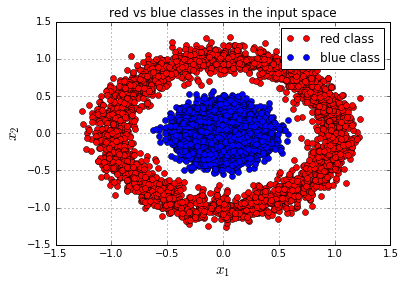

In [4]:
#Plot both classes on the x1, x2 plane
plt.plot(x_red[:,0], x_red[:,1], 'ro', label='red class')
plt.plot(x_blue[:,0], x_blue[:,1], 'bo', label='blue class')
plt.grid()
plt.legend(loc=1)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.title('red vs blue classes in the input space')
plt.show()

In [5]:
#Split dataset into trian and test
X_train, X_test, y_train, y_test = train_test_split(X, t, test_size = 0.3, random_state = 0)

### 1.2 Simple Logistic Regression
![logistic model](SimpleANN02.png)

In [6]:
#Build the model with keras' sequential model
#model = Sequential()
#model.add(Dense(1, input_dim = 2, kernel_initializer = 'glorot_normal', activation = 'sigmoid'))
#sgd = SGD(lr=0.001, decay = 1e-6, momentum = 0.9, nesterov = True)
#model.compile(loss = 'binary_crossentropy', metrics=['accuracy'], optimizer = 'adam')
#history = model.fit(X_train, y_train, validation_data = (X_test, y_test), verbose = 1, batch_size = 64, epochs = 10)

In [7]:
model = Sequential()
model.add(Dense(1, input_dim = 2, kernel_initializer = 'glorot_normal', activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', metrics=['accuracy'], optimizer = 'adam')
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), verbose = 1, batch_size = 64, epochs = 10)

Train on 3500 samples, validate on 1500 samples
Epoch 1/10
3500/3500 [==============================] - 0s - loss: 0.7385 - acc: 0.5043 - val_loss: 0.7384 - val_acc: 0.5073
Epoch 2/10
3500/3500 [==============================] - 0s - loss: 0.7338 - acc: 0.5023 - val_loss: 0.7339 - val_acc: 0.5047
Epoch 3/10
3500/3500 [==============================] - 0s - loss: 0.7297 - acc: 0.5017 - val_loss: 0.7299 - val_acc: 0.5033
Epoch 4/10
3500/3500 [==============================] - 0s - loss: 0.7258 - acc: 0.5006 - val_loss: 0.7262 - val_acc: 0.5007
Epoch 5/10
3500/3500 [==============================] - 0s - loss: 0.7224 - acc: 0.4969 - val_loss: 0.7227 - val_acc: 0.4953
Epoch 6/10
3500/3500 [==============================] - 0s - loss: 0.7192 - acc: 0.4957 - val_loss: 0.7196 - val_acc: 0.4960
Epoch 7/10
3500/3500 [==============================] - 0s - loss: 0.7164 - acc: 0.4923 - val_loss: 0.7169 - val_acc: 0.4953
Epoch 8/10
3500/3500 [==============================] - 0s - loss: 0.7138 - a

In [8]:
#Predition function by calling keras model predict method
#Will use 0.5 as threshold for binary classification
def nn_predict(model, X):
    
    return (model.predict(X) > 0.5).astype(int)

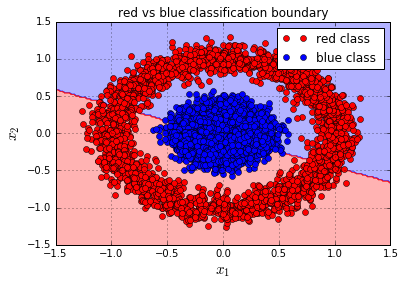

In [9]:
#Plot the resulting decision boundary
#Generate a grid over the input space to plot the color of the
#classification at that grid point
nb_of_xs = 200
xs1 = np.linspace(-2, 2, num = nb_of_xs)
xs2 = np.linspace(-2, 2, num = nb_of_xs)
xx, yy = np.meshgrid(xs1, xs2) # create the grid
#Initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        pred = nn_predict(model, np.array([[xx[i,j], yy[i,j]]]))
        classification_plane[i, j] = pred[0, 0]
#Create a color map to show the classification colors of each grid point
cmap = ListedColormap([
        colorConverter.to_rgba('b', alpha = 0.30),
        colorConverter.to_rgba('r', alpha = 0.30)])

#Plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap=cmap)
#Plot both classes on the x1, x2 plane
plt.plot(x_red[:, 0], x_red[:, 1], 'ro', label = 'red class')
plt.plot(x_blue[:, 0], x_blue[:, 1], 'bo', label = 'blue class ')
plt.grid()
plt.legend(loc = 1)
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.title('red vs blue classification boundary')
plt.show()

In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [11]:
y_test_pred = nn_predict(model, X_test)
#Show confusion table
conf_matrix = confusion_matrix(y_test, y_test_pred, labels = None)

Confusion matrix, without normalization
[[356 365]
 [399 380]]


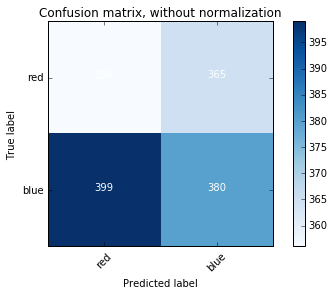

In [12]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=['red', 'blue'],
                      title='Confusion matrix, without normalization')

### 1.3 Neural Network with Nonlinear Activation
In the previous section, we see that the logistic cannot correctly separate the two classes. The reason is that logistic regression is a linear model, which cannot separate nonlinear problem. From the classification boundary graph, we saw the separation bounday is a linear line. 

To correctly separate the two classes, we need add some nonlinear activation function and with more hidden layers. Keras offer lots of nonlinear functions: tanh, relu, sigmoid, softplus, etc. For more information, please see [Activation Functions in keras](https://keras.io/activations/).

In this part, we will use a user-defined activation function, radial basis funciton(RBF). The RBF is a transfer function that is not usually used in neural networks, except for radial basis function networks. One of the most common transfer functions in neural networks is the sigmoid function. The RBF will allow to separate the blue samples from the red samples in this simple example by only activating for a certain region around the origin. The RBF is plotted in the figure below and is defined in this example as:

$$\text{RBF} = \phi(z) = e^{-z^2} $$

The derivative of this RBF function is:

$$\frac{d \phi(z)}{dz} = -2 z e^{-z^2} = -2 z \phi(z)$$

In [13]:
#Define the rbf function for visual purpose
def rbf_np(z):
    return np.exp(-z**2)

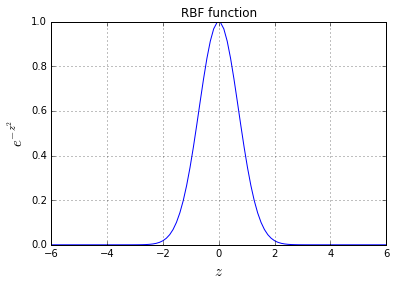

In [14]:
#Plot the rbf function
z = np.linspace(-6, 6, 100)
plt.plot(z, rbf_np(z), 'b-')
plt.xlabel('$z$', fontsize=15)
plt.ylabel('$e^{-z^2}$', fontsize=15)
plt.title('RBF function')
plt.grid()
plt.show()

In [15]:
#Radius basis function for keras activation
def rbf(x):
    return K.exp(-1.0 * x ** 2)

In [16]:
#Build the model with keras' sequential model
#model = Sequential()
#model.add(Dense(3, input_dim = 2, kernel_initializer = 'glorot_normal'))
#model.add(Activation(rbf))
#model.add(Dense(1, input_dim = 3, kernel_initializer = 'glorot_normal', activation = 'sigmoid'))
#sgd = SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
#model.compile(loss = 'binary_crossentropy', metrics=['accuracy'], optimizer = sgd)
#history = model.fit(X_train, y_train, verbose = 1, validation_data = (X_test, y_test), batch_size = 64, epochs = 10)

In [17]:
model = Sequential()
model.add(Dense(3, input_dim = 2, kernel_initializer = 'glorot_normal'))
model.add(Activation(rbf))
model.add(Dense(1, input_dim = 3, kernel_initializer = 'glorot_normal', activation = 'sigmoid'))
sgd = SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(loss = 'binary_crossentropy', metrics=['accuracy'], optimizer = sgd)
history = model.fit(X_train, y_train, verbose = 1, validation_data = (X_test, y_test), batch_size = 10, epochs = 10)

Train on 3500 samples, validate on 1500 samples
Epoch 1/10
3500/3500 [==============================] - 0s - loss: 0.5091 - acc: 0.8043 - val_loss: 0.3835 - val_acc: 0.8627
Epoch 2/10
3500/3500 [==============================] - 0s - loss: 0.2973 - acc: 0.9591 - val_loss: 0.2238 - val_acc: 0.9967
Epoch 3/10
3500/3500 [==============================] - 0s - loss: 0.2036 - acc: 0.9966 - val_loss: 0.1691 - val_acc: 0.9980
Epoch 4/10
3500/3500 [==============================] - 0s - loss: 0.1612 - acc: 0.9971 - val_loss: 0.1374 - val_acc: 0.9980
Epoch 5/10
3500/3500 [==============================] - 0s - loss: 0.1354 - acc: 0.9983 - val_loss: 0.1173 - val_acc: 0.9980
Epoch 6/10
3500/3500 [==============================] - 0s - loss: 0.1177 - acc: 0.9974 - val_loss: 0.1036 - val_acc: 0.9973
Epoch 7/10
3500/3500 [==============================] - 0s - loss: 0.1041 - acc: 0.9980 - val_loss: 0.0918 - val_acc: 0.9987
Epoch 8/10
3500/3500 [==============================] - 0s - loss: 0.0939 - a

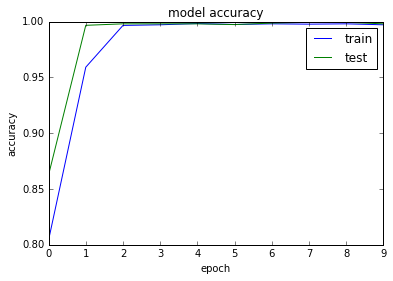

In [18]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

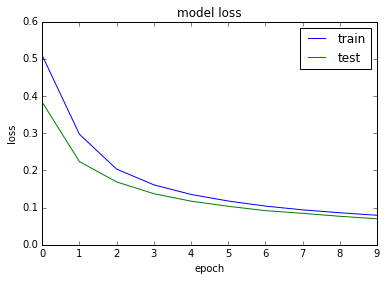

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

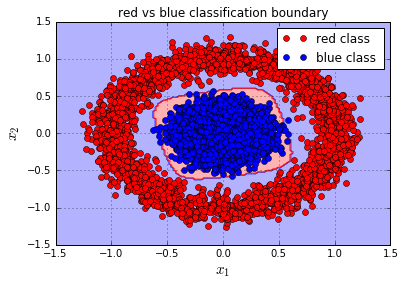

In [20]:
#Plot the resulting decision boundary
#Generate a grid over the input space to plot the color of the
#classification at that grid point
nb_of_xs = 200
xs1 = np.linspace(-2, 2, num = nb_of_xs)
xs2 = np.linspace(-2, 2, num = nb_of_xs)
xx, yy = np.meshgrid(xs1, xs2) # create the grid
#Initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        pred = nn_predict(model, np.array([[xx[i,j], yy[i,j]]]))
        classification_plane[i, j] = pred[0, 0]
#Create a color map to show the classification colors of each grid point
cmap = ListedColormap([
        colorConverter.to_rgba('b', alpha = 0.30),
        colorConverter.to_rgba('r', alpha = 0.30)])

#Plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap = cmap)
#Plot both classes on the x1, x2 plane
plt.plot(x_red[:, 0], x_red[:, 1], 'ro', label = 'red class')
plt.plot(x_blue[:, 0], x_blue[:, 1], 'bo', label = 'blue class ')
plt.grid()
plt.legend(loc = 1)
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.title('red vs blue classification boundary')
plt.show()

In [21]:
t_pred = nn_predict(model, X)
#Show confusion table
conf_matrix = confusion_matrix(t, t_pred, labels = None)

Confusion matrix, without normalization
[[2500    0]
 [   8 2492]]


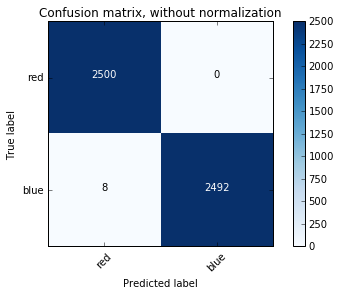

In [22]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=['red', 'blue'],
                      title='Confusion matrix, without normalization')

# 2. 卷积神经网络

## 2.1 加载MNIST数据

In [23]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [24]:
X_train.shape

(60000, 28, 28)

In [25]:
def plot_figure(im, interp = False):
    f = plt.figure(figsize = (3, 6))
    plt.gray()
    plt.imshow(im, interpolation = None if interp else 'none')

## 2.2 卷积

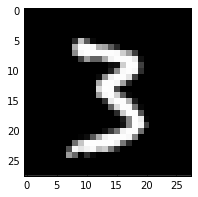

In [26]:
plot_figure(X_train[130])

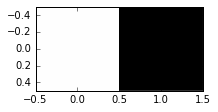

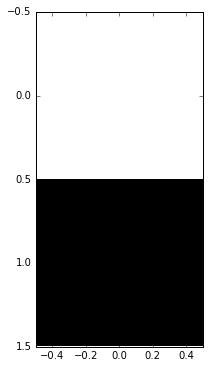

In [27]:
vertical = [[1, -1]]

plot_figure(vertical)

horizontal = [[1], [-1]]

plot_figure(horizontal)

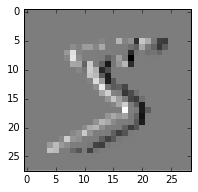

In [28]:
plot_figure(signal.convolve(X_train[0], vertical))

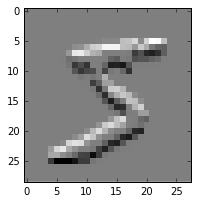

In [29]:
plot_figure(signal.convolve(X_train[0], horizontal))

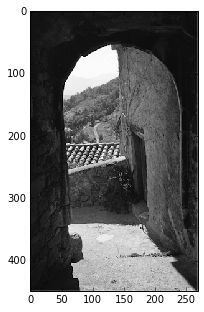

In [30]:
# Load an color image in grayscale
demo_image = cv2.imread('demo.png',0)
plot_figure(demo_image[:, ::-1])

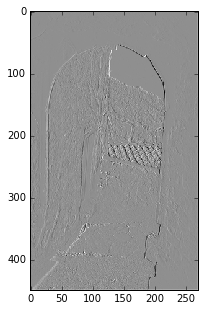

In [31]:
plot_figure(signal.convolve(demo_image, vertical))

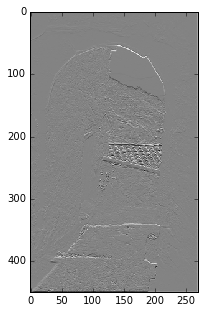

In [32]:
plot_figure(signal.convolve(demo_image, horizontal))

### 2.3 Simple Deep Neural Network

In [33]:
# Flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [34]:
num_pixels

784

In [35]:
X_train.shape

(60000, 784)

In [36]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [37]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [38]:
num_classes = len(set(y_train))
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [39]:
y_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [40]:
# create model
#model = Sequential()
#model.add(Dense(num_pixels, input_dim = num_pixels, activation = 'relu'))
#model.add(Dense(num_classes, activation = 'softmax'))
# Compile model
#model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [41]:
model = Sequential()
model.add(Dense(num_pixels, input_dim = num_pixels, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [42]:
# Fit the model
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 200, verbose = 1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Baseline Error: %.2f%%" % (100 - scores[1] * 100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 0s - loss: 0.2767 - acc: 0.9227 - val_loss: 0.1398 - val_acc: 0.9590
Epoch 2/10
60000/60000 [==============================] - 0s - loss: 0.1108 - acc: 0.9683 - val_loss: 0.0922 - val_acc: 0.9713
Epoch 3/10
60000/60000 [==============================] - 0s - loss: 0.0720 - acc: 0.9790 - val_loss: 0.0814 - val_acc: 0.9747
Epoch 4/10
60000/60000 [==============================] - 0s - loss: 0.0509 - acc: 0.9855 - val_loss: 0.0730 - val_acc: 0.9781
Epoch 5/10
60000/60000 [==============================] - 0s - loss: 0.0369 - acc: 0.9895 - val_loss: 0.0636 - val_acc: 0.9792
Epoch 6/10
60000/60000 [==============================] - 0s - loss: 0.0276 - acc: 0.9927 - val_loss: 0.0625 - val_acc: 0.9793
Epoch 7/10
60000/60000 [==============================] - 0s - loss: 0.0197 - acc: 0.9953 - val_loss: 0.0619 - val_acc: 0.9809
Epoch 8/10
60000/60000 [==============================] - 0s 

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


## 2.4 Convolution Neural Network

In [44]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [45]:
X_train.shape

(60000, 28, 28, 1)

In [46]:
#model = Sequential()
#model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
#model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
#model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dense(num_classes, activation='softmax'))
# Compile model
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 10, batch_size = 200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100 - scores[1] * 100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s - loss: 0.2225 - acc: 0.9338 - val_loss: 0.0547 - val_acc: 0.9832
Epoch 2/10
60000/60000 [==============================] - 3s - loss: 0.0520 - acc: 0.9839 - val_loss: 0.0447 - val_acc: 0.9855
Epoch 3/10
60000/60000 [==============================] - 3s - loss: 0.0370 - acc: 0.9888 - val_loss: 0.0293 - val_acc: 0.9901
Epoch 4/10
60000/60000 [==============================] - 3s - loss: 0.0270 - acc: 0.9913 - val_loss: 0.0409 - val_acc: 0.9869
Epoch 5/10
60000/60000 [==============================] - 3s - loss: 0.0221 - acc: 0.9929 - val_loss: 0.0252 - val_acc: 0.9920
Epoch 6/10
60000/60000 [==============================] - 3s - loss: 0.0176 - acc: 0.9942 - val_loss: 0.0273 - val_acc: 0.9906
Epoch 7/10
60000/60000 [==============================] - 3s - loss: 0.0151 - acc: 0.9950 - val_loss: 0.0217 - val_acc: 0.9932
Epoch 8/10
60000/60000 [==============================] - 3s 

In [49]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
__________